<a href="https://colab.research.google.com/github/Jacofeldman/Metodos1_JacoboFeldman/blob/main/Parcial1/Minimizaci%C3%B3n_del_camino_%C3%B3ptico7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

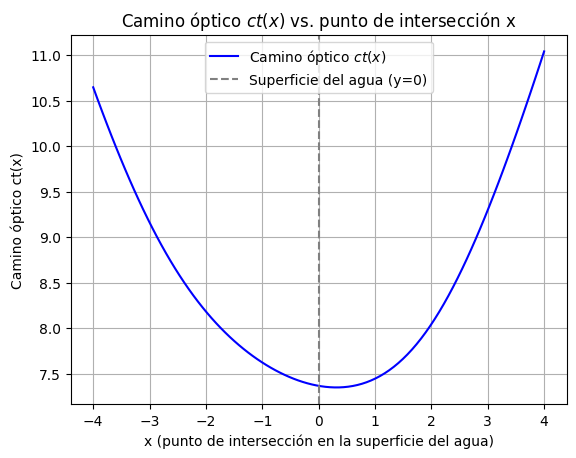

El punto de entrada que minimiza el tiempo de viaje es 0.3169057569910753 en x
El tiempo minimo es 2.451566269808618e-08 en segundos
Ángulo de incidencia α0: 58.9112 grados
Ángulo de refracción α1: 40.0822 grados
Verificación de la ley de Snell (debe ser 0): 0.00000000


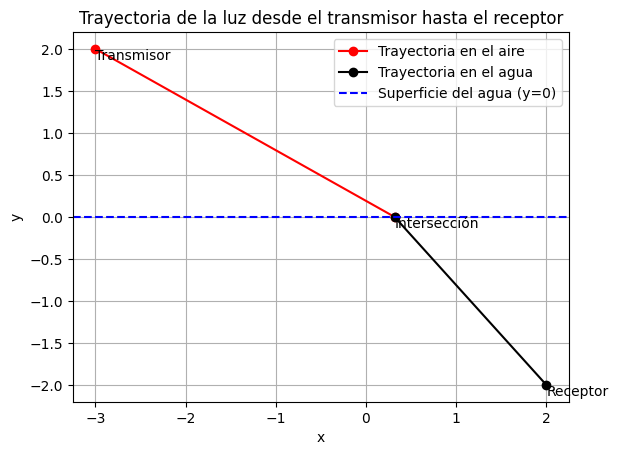

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#b
n0=1
n1=1.33
T0=-3
T1=2
R0=2
R1=-2
x_valor=np.linspace(-4, 4, 100)
def camino_optico(x):
   term1 = np.sqrt((x - T0)**2 + T1**2)
   term2 = np.sqrt((x - R0)**2 + R1**2)
   return n0 * term1 + n1 * term2




ct_valor=camino_optico(x_valor)
plt.plot(x_valor, ct_valor, label="Camino óptico $ct(x)$", color="blue")
plt.xlabel("x (punto de intersección en la superficie del agua)")
plt.ylabel("Camino óptico ct(x)")
plt.title("Camino óptico $ct(x)$ vs. punto de intersección x")
plt.axvline(x=0, color='gray', linestyle='--', label="Superficie del agua (y=0)")
plt.grid(True)
plt.legend()
plt.show()
#c
def derivada(f,x,h=1e-5):
  return (f(x+h)-f(x-h))/(2*h)
def derivada_segunda(f,x,h=1e-5):
  return (f(x+h)-2*f(x)+f(x-h))/h**2
def newton_raphson(f, x0, h, epsilon):
    x = x0
    while True:
        f_prime = derivada(f, x, h)
        f_double_prime = derivada_segunda(f, x, h)
        x_new = x - f_prime / f_double_prime
        if abs(x_new - x) < epsilon:
            break
        x = x_new
    return x
x0=0.25 #cualitativamente parece que este es el punto donde se minimiza el tiempo
h= 1e-5
epsilon=1e-9
x_min = newton_raphson(camino_optico, x0, h, epsilon)
t_min = camino_optico(x_min)/2.998e8 # velocidad de la luz en m/s
print("El punto de entrada que minimiza el tiempo de viaje es",x_min,"en x")
print("El tiempo minimo es",t_min,"en segundos")
#d
m_incidencia = T1 / (T0 - x_min)
alpha0 = np.arctan(1 / m_incidencia)


m_refraccion = R1 / (R0 - x_min)
alpha1 = np.arctan(1 / m_refraccion)


alpha0_deg = -np.degrees(alpha0)
alpha1_deg = -np.degrees(alpha1)


snell_check = n0 * np.sin(alpha0) - n1 * np.sin(alpha1)

print(f"Ángulo de incidencia α0: {alpha0_deg:.4f} grados")
print(f"Ángulo de refracción α1: {alpha1_deg:.4f} grados")
print(f"Verificación de la ley de Snell (debe ser 0): {snell_check:.8f}")


fig, ax = plt.subplots()


ax.plot([T0, x_min], [T1, 0], label="Trayectoria en el aire", color='red', marker='o')
ax.plot([x_min, R0], [0, R1], label="Trayectoria en el agua", color='black', marker='o')
ax.axhline(y=0, color='blue', linestyle='--', label="Superficie del agua (y=0)")


ax.text(T0, T1, "Transmisor", fontsize=10, verticalalignment='top', horizontalalignment='left')
ax.text(R0, R1, "Receptor", fontsize=10, verticalalignment='top', horizontalalignment='left')
ax.text(x_min, 0, "Intersección", fontsize=10, verticalalignment='top', horizontalalignment='left')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Trayectoria de la luz desde el transmisor hasta el receptor')
ax.legend()
ax.grid(True)
plt.show()


se cumple la ley de snell porque la diferencia de los angulos de incidencia y refraccion por la refraccion por el medio tiene que ser 0
